In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../')
from functions.plotting import *
from functions.filtering import *

In [2]:
# load data from steinmetz dir
alldat = np.load('../steinmetz/steinmetz_part0.npz', allow_pickle=True)['dat']
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part1.npz', allow_pickle=True)['dat']))
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part2.npz', allow_pickle=True)['dat']))
print(f"number of recordings: {alldat.shape}")

number of recordings: (39,)


In [3]:
visp = "VISp"

In [4]:
filtered_alldat, filtered_alldat_idx = filter_contralateral_trials_full_contrast(alldat,
                                                                                 visp,
                                                                                 everything=True)
# data structure:
# 0: mouse_name
# 1: mouse_spikes
# 2: mouse_regions
# 3: mouse_gocue
# 4: mouse_resptime
# 5: mouse_wheel
# 6: mouse_feedback
# 7: contrast right
# 8: contrast left
# 9: mouse_response

In [5]:
neurons_topk = np.asarray([[ 54,  85,   0,  35,  50,  81,  61, 163, 161,  77], [79, 94, 74, 96, 52, 23, 29, 12, 32, 56], [33,  5, 16, 32,  4, 13, 34, 26, 31,  6], [17, 46, 24, 43, 35, 41, 45, 22, 14, 37], [104,  46,  84,  95,  99,  55,  98,  25,  19,  38], [56, 55, 34, 61, 54,  8, 39, 24, 10, 48], [40, 23, 22, 17,  4,  8, 41, 24,  1, 11], [116,  35, 110,  57,  90, 115,  31,  55, 105,  46], [ 63, 124,   8, 111, 128,  29, 121,  80,   5,  85], [74, 86, 52, 80, 10, 57, 17, 45, 37,  7], [  9,  83, 122, 136,  48,  92, 153, 111,  47, 112], [ 1, 10, 13,  7, 14,  3,  6,  2,  4, 12]])
print(neurons_topk.shape)

(12, 10)


In [6]:
def get_trials(contrast_r, contrast_l, stim_r, stim_l):
    idx = np.where((contrast_r==stim_r) & (contrast_l==stim_l))[0]
    return idx

In [7]:
topk_neurons = []
topk_contrast_r = []
topk_contrast_l = []
topk_wheel = []
topk_response = []
trials_RL_idx = []
trials_LR_idx = []
for idx, neurons in enumerate(neurons_topk):
    topk_neurons.append(filtered_alldat[idx][1][neurons])
    topk_contrast_r.append(filtered_alldat[idx][7])
    topk_contrast_l.append(filtered_alldat[idx][8])
    topk_wheel.append(filtered_alldat[idx][5])
    topk_response.append(filtered_alldat[idx][9])
    trials_RL_idx.append(get_trials(topk_contrast_r[idx], topk_contrast_l[idx], stim_r=0.25, stim_l=0))
    trials_LR_idx.append(get_trials(topk_contrast_r[idx], topk_contrast_l[idx], stim_r=0, stim_l=0.25))

In [8]:
# convert spikes to times for eventplot
combined_neurons_eventplot = []
for recording in topk_neurons:
    combined_trials = []
    for neuron in recording:
        combined_spks = []
        for trial in neuron:
            new_trial = []
            for idx, spk in enumerate(trial):
#                 if idx < 0:
#                     continue
#                 else: 
#                     new_trial.append(spk)
                if spk == 0:
                    new_trial.append(0)
                else:
                    new_trial.append(idx)
            combined_spks.append(np.asarray(new_trial))
        combined_trials.append(np.asarray(combined_spks))
    combined_neurons_eventplot.append(np.asarray(combined_trials))
# combined_neurons_eventplot = np.asarray(combined_neurons_eventplot)

In [9]:
# convert spikes to times for eventplot
combined_neurons = []
for recording in topk_neurons:
    combined_trials = []
    for neuron in recording:
        combined_spks = []
        for trial in neuron:
            new_trial = []
            for idx, spk in enumerate(trial):
                if idx < 0:
                    continue
                else: 
                    new_trial.append(spk)
#                 if spk == 0:
#                     new_trial.append(0)
#                 else:
#                     new_trial.append(idx)
            combined_spks.append(np.asarray(new_trial))
        combined_trials.append(np.asarray(combined_spks))
    combined_neurons.append(np.asarray(combined_trials))
# combined_neurons = np.asarray(combined_neurons)

In [10]:
combined_neurons[0].shape

(10, 214, 250)

In [11]:
combined_neurons_RL = []
combined_neurons_LR = []
for idx, recording in enumerate(combined_neurons):
    for idn, neuron in enumerate(recording):
        combined_neurons_RL.append(neuron[trials_RL_idx[idx]])
        combined_neurons_LR.append(neuron[trials_LR_idx[idx]])
combined_neurons_RL = np.asarray(combined_neurons_RL)
combined_neurons_LR = np.asarray(combined_neurons_LR)

In [12]:
neurons_LR = np.vstack(combined_neurons_LR)
neurons_RL = np.vstack(combined_neurons_RL)

[0.0146789  0.01559633 0.01834862 0.0146789  0.01192661 0.01192661
 0.00733945 0.0146789  0.0146789  0.00917431 0.01192661 0.00550459
 0.0146789  0.01284404 0.01009174 0.01192661 0.01284404 0.01192661
 0.01192661 0.01009174 0.01192661 0.00733945 0.01743119 0.01192661
 0.00917431 0.00733945 0.00550459 0.01009174 0.00550459 0.00825688
 0.00825688 0.00550459 0.01100917 0.00642202 0.01009174 0.0146789
 0.00733945 0.01834862 0.01192661 0.01100917 0.00917431 0.01009174
 0.00917431 0.01651376 0.01192661 0.01284404 0.01376147 0.01376147
 0.01284404 0.01926606 0.00642202 0.00825688 0.01284404 0.01192661
 0.00825688 0.00825688 0.01009174 0.01284404 0.01100917 0.0146789
 0.01009174 0.01559633 0.01192661 0.01192661 0.01192661 0.01376147
 0.0146789  0.01192661 0.00733945 0.01192661 0.0146789  0.01651376
 0.01926606 0.01100917 0.02293578 0.01743119 0.01743119 0.01284404
 0.01834862 0.01284404 0.01192661 0.02293578 0.02844037 0.01559633
 0.01559633 0.01559633 0.01284404 0.01743119 0.0146789  0.021100

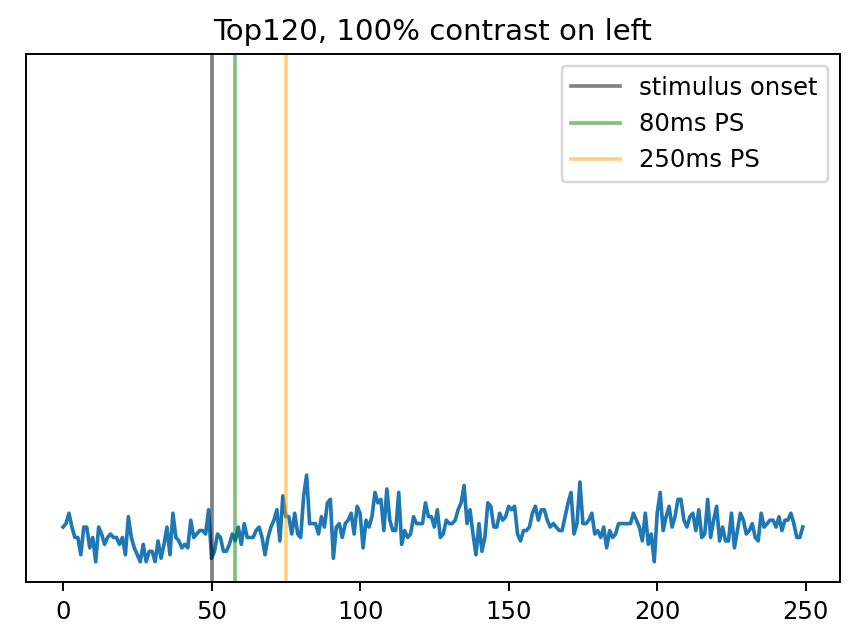

In [22]:
fig = plt.figure(dpi=175)
plt.plot(np.mean(neurons_LR, axis=0));
plt.axvline(50, color="black", alpha=0.5, label="stimulus onset")
plt.axvline(58, color="green", alpha=0.5, label="80ms PS")
plt.axvline(75, color="orange", alpha=0.5, label="250ms PS")
plt.legend();
figs = plt.gca()
figs.get_yaxis().set_ticks([])
plt.ylim([0,0.14])
plt.title("Top120, 100% contrast on left");
print(np.mean(neurons_LR, axis=0))

[0.00508475 0.01186441 0.01016949 0.00932203 0.01016949 0.01271186
 0.00932203 0.01186441 0.01016949 0.01016949 0.0059322  0.00762712
 0.01016949 0.00847458 0.01186441 0.00932203 0.01186441 0.00762712
 0.01271186 0.00508475 0.00932203 0.00677966 0.00508475 0.01016949
 0.00423729 0.00677966 0.00762712 0.00338983 0.00932203 0.00508475
 0.00762712 0.00932203 0.00847458 0.00847458 0.00847458 0.0059322
 0.01694915 0.01016949 0.01525424 0.01271186 0.01525424 0.00932203
 0.00847458 0.00847458 0.01101695 0.00932203 0.01525424 0.01016949
 0.01525424 0.01355932 0.01440678 0.00677966 0.01101695 0.01016949
 0.01186441 0.02118644 0.0220339  0.0279661  0.06525424 0.06271186
 0.07542373 0.06016949 0.04661017 0.02542373 0.03305085 0.02457627
 0.01525424 0.01864407 0.01949153 0.01949153 0.01694915 0.02288136
 0.03135593 0.03050847 0.03983051 0.0440678  0.04322034 0.03559322
 0.03898305 0.03050847 0.04067797 0.04322034 0.03728814 0.03474576
 0.04067797 0.04152542 0.02966102 0.03305085 0.02711864 0.03474

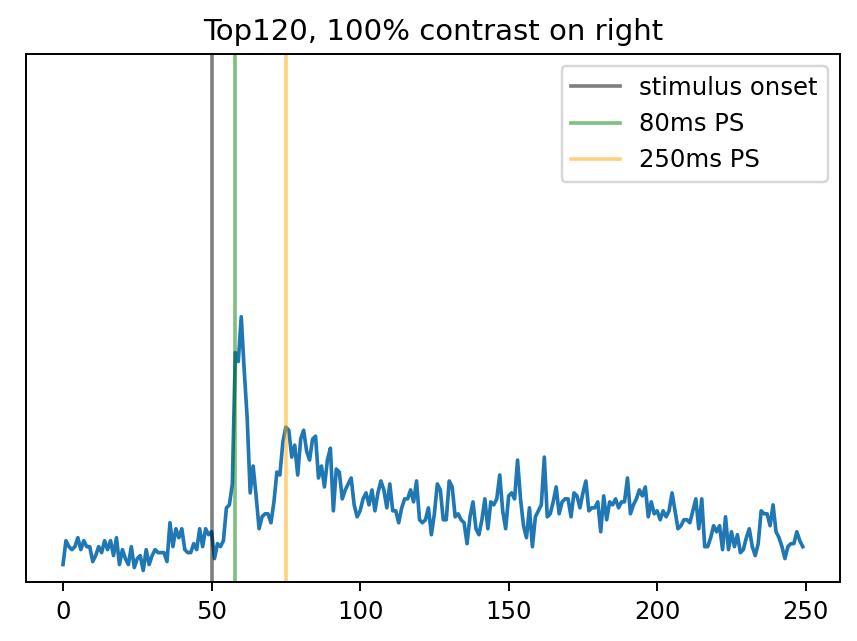

In [21]:
fig = plt.figure(dpi=175)
plt.plot(np.mean(neurons_RL, axis=0));
plt.axvline(50, color="black", alpha=0.5, label="stimulus onset")
plt.axvline(58, color="green", alpha=0.5, label="80ms PS")
plt.axvline(75, color="orange", alpha=0.5, label="250ms PS")
plt.legend();
figs = plt.gca()
figs.get_yaxis().set_ticks([])
plt.ylim([0,0.15])
plt.title("Top120, 100% contrast on right");
print(np.mean(neurons_RL, axis=0))

In [15]:
def plot_wheel_movement1(trial, wheel_to_mm=0.135, sigma=3, title="wheel position x time", save_path="./data.png", save=False):
    plt.plot(gaussian_filter1d(np.cumsum(trial * wheel_to_mm), 3))
    plt.axvline(50, color="limegreen", label="stimulus onset")
    plt.xlabel("10ms time bins")
    plt.ylabel(f"wheel position (mm)")
    plt.ylim([-250,250])
    plt.title(title)
    plt.legend()
    save_or_plot(save_path, save)

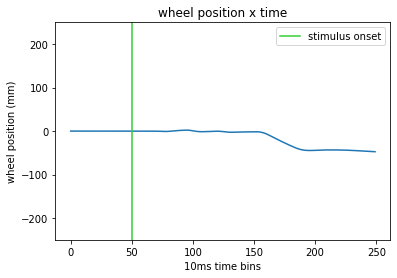

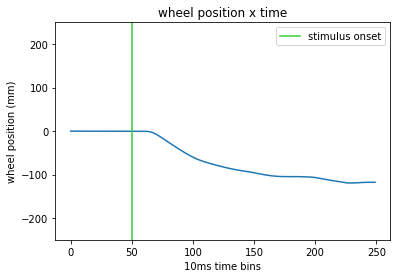

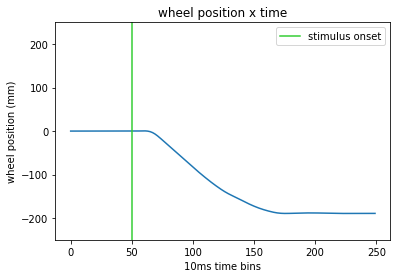

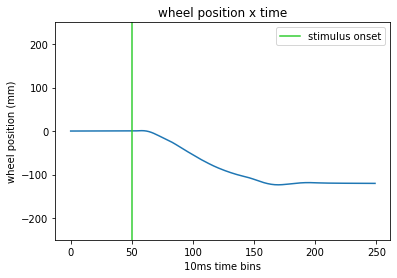

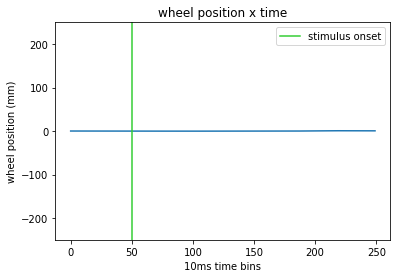

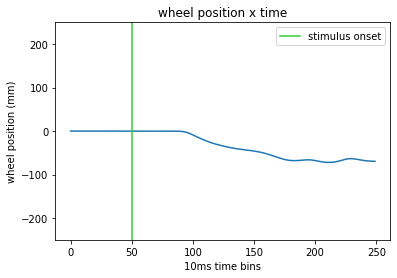

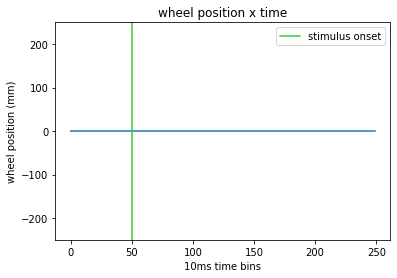

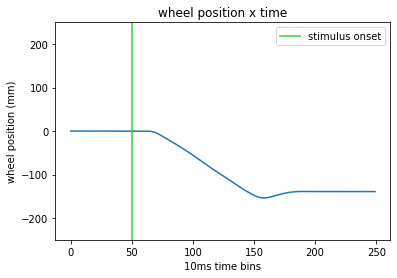

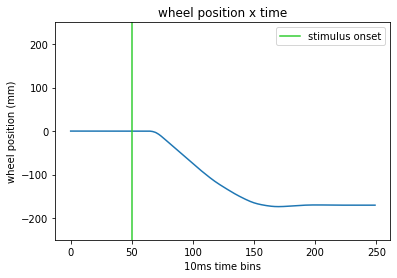

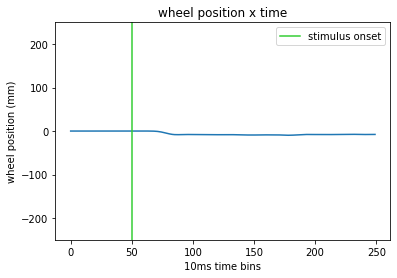

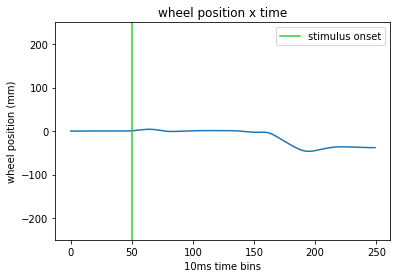

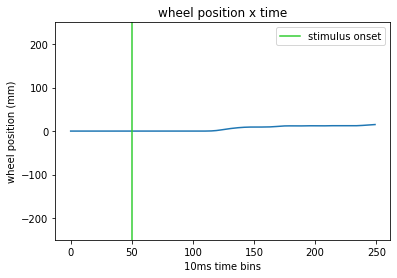

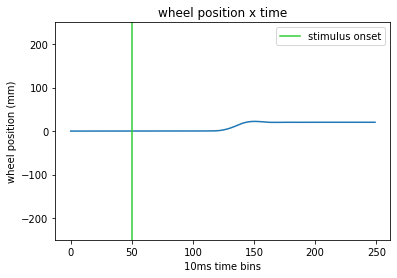

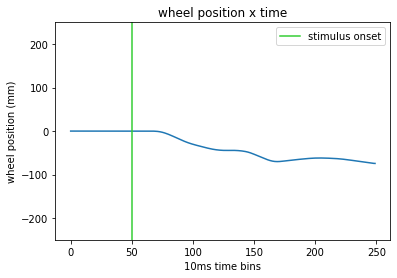

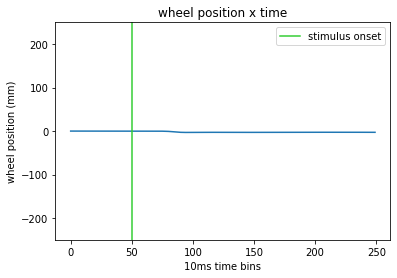

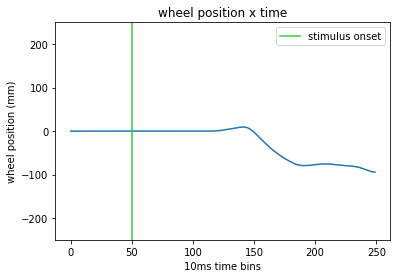

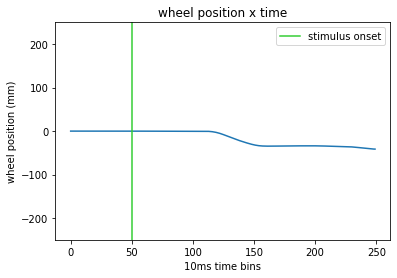

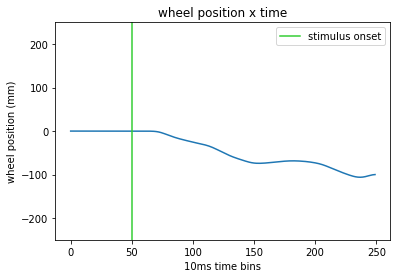

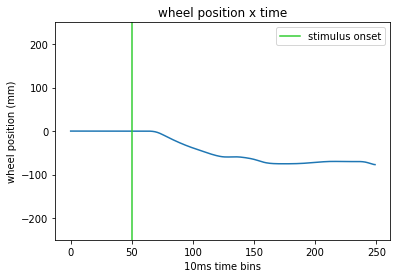

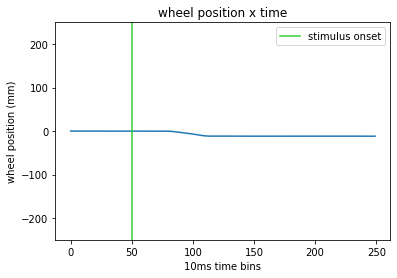

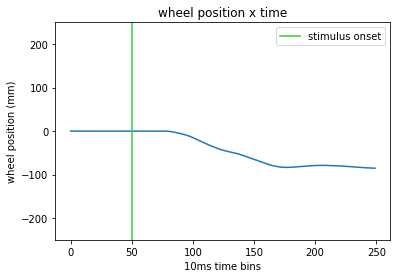

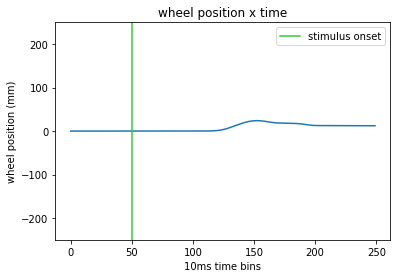

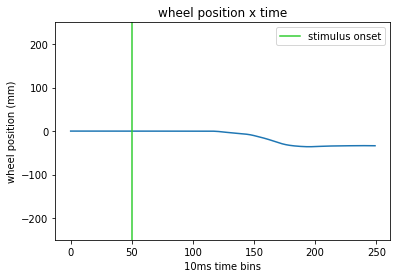

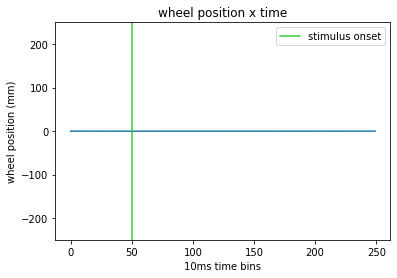

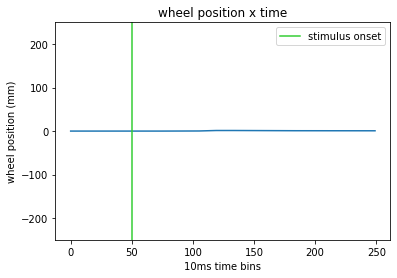

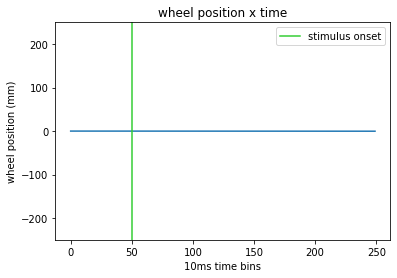

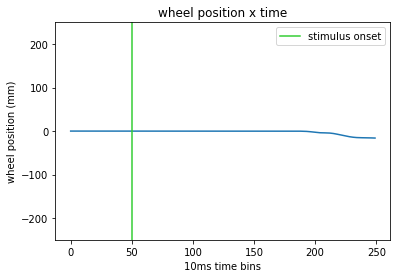

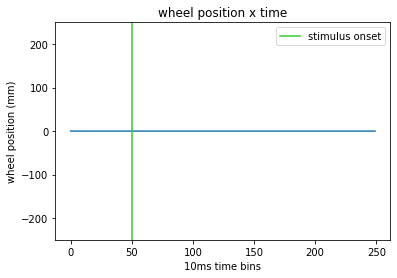

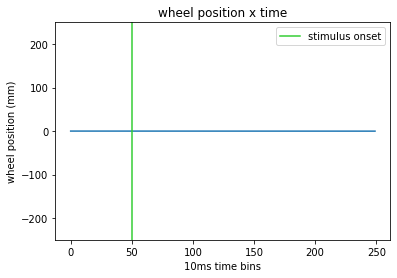

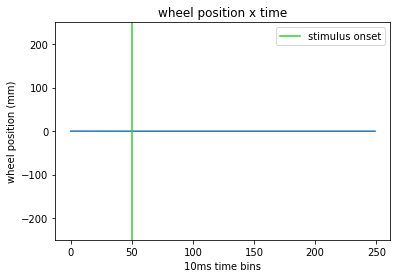

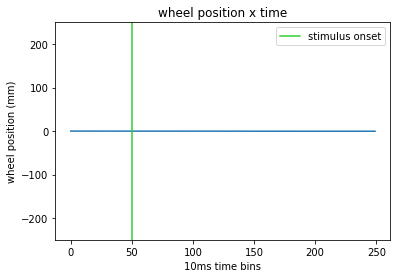

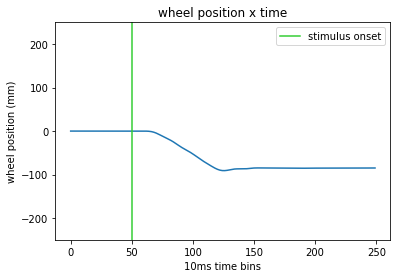

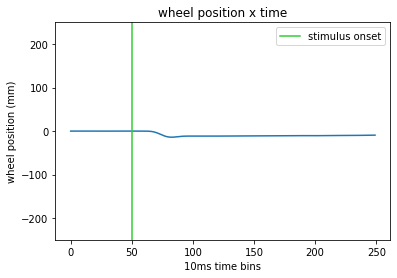

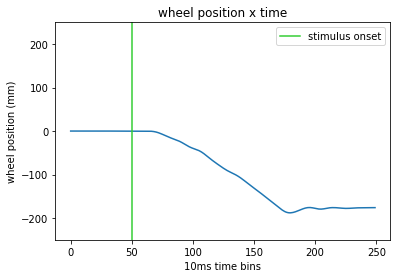

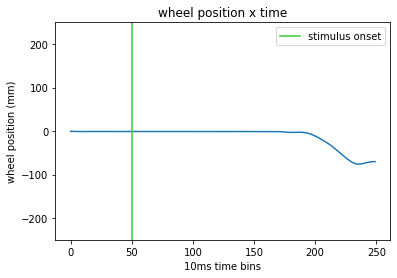

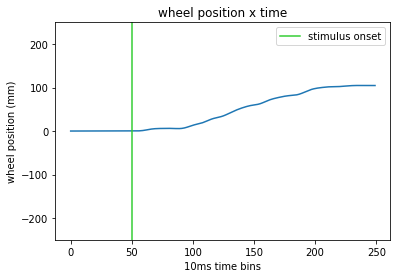

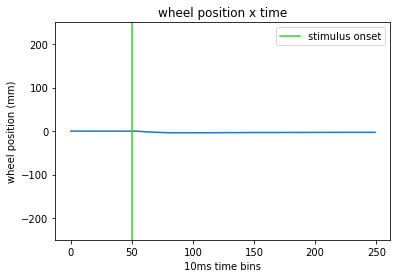

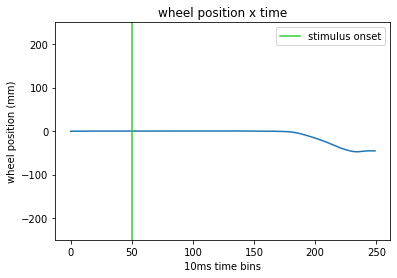

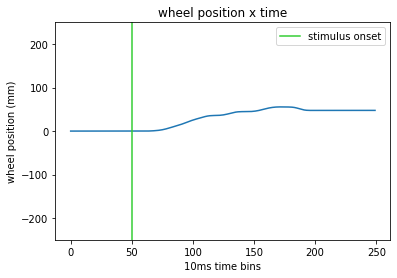

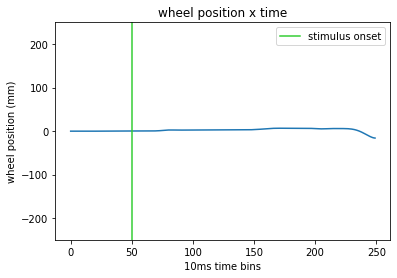

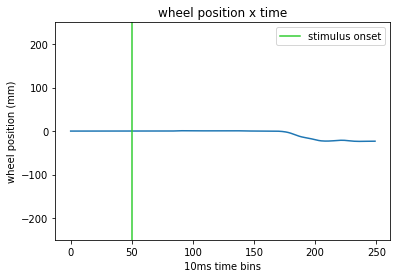

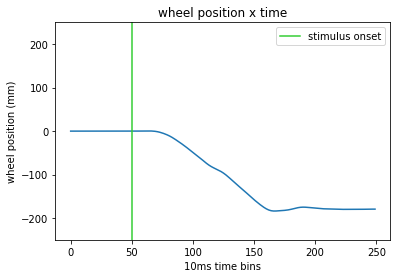

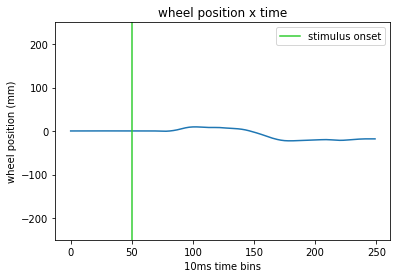

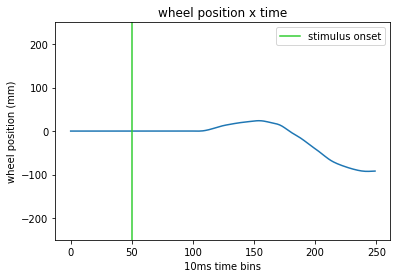

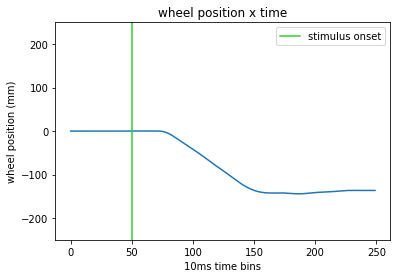

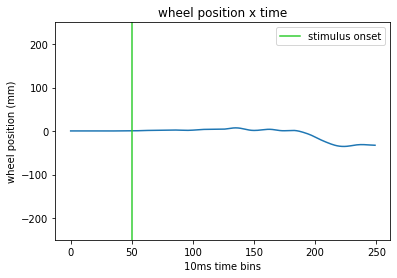

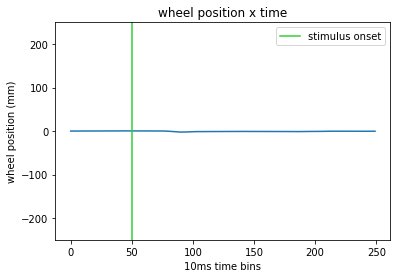

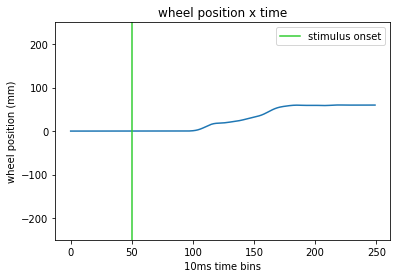

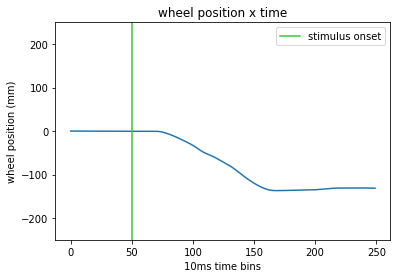

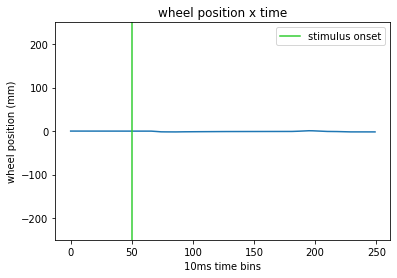

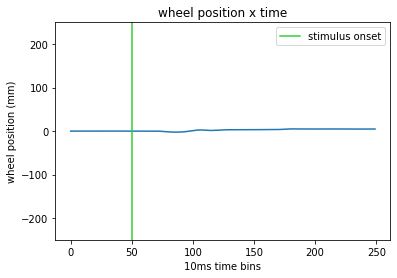

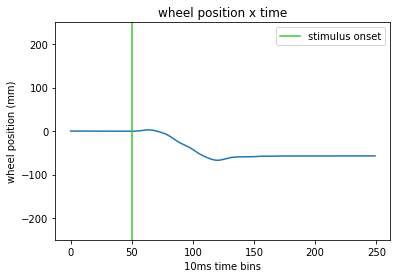

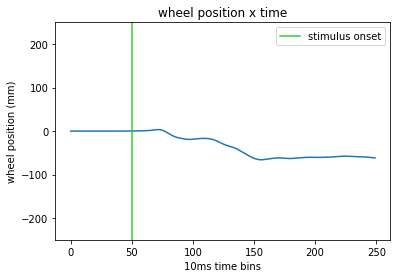

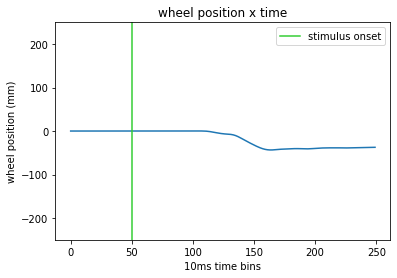

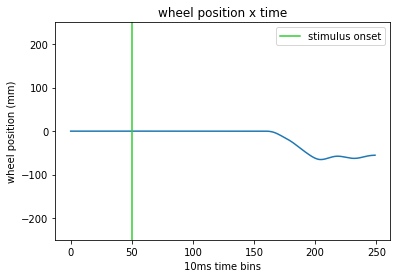

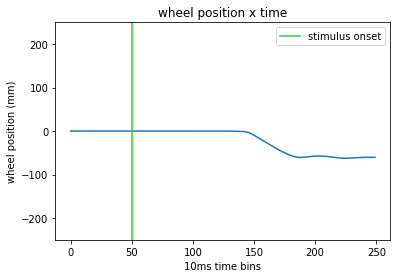

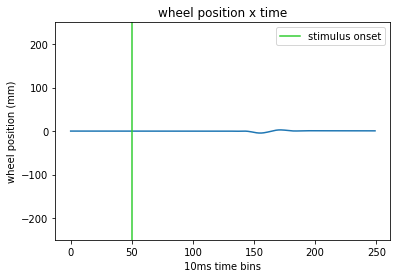

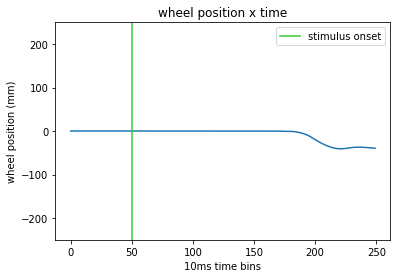

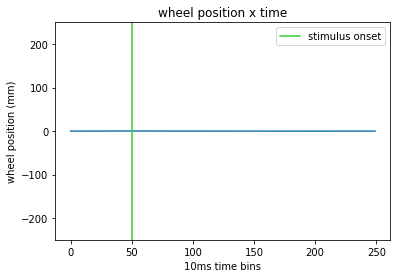

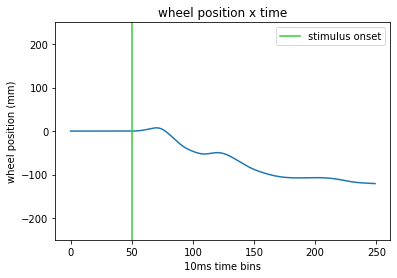

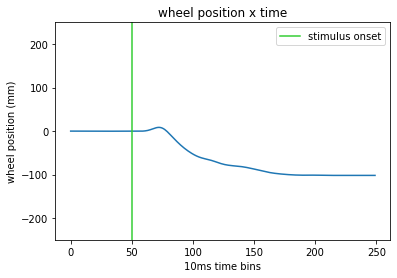

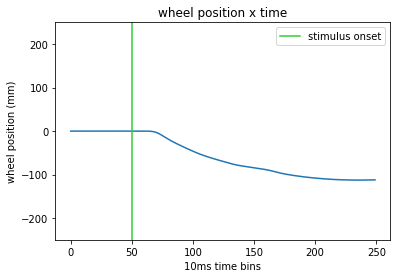

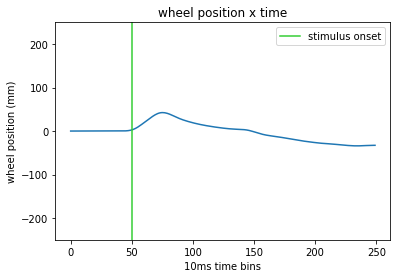

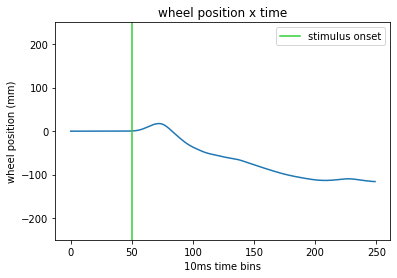

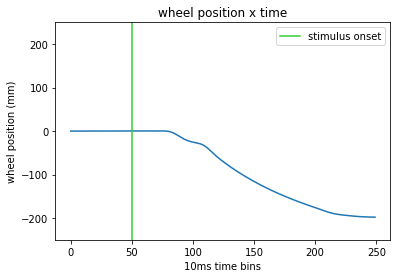

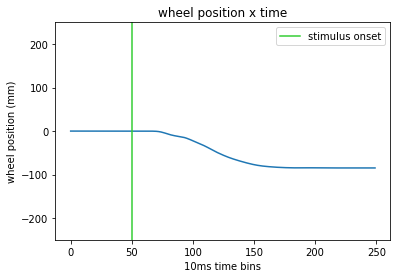

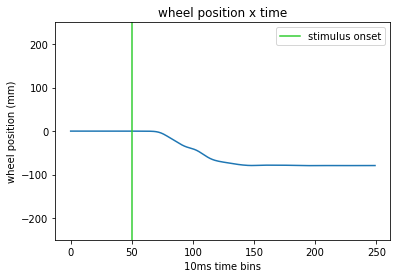

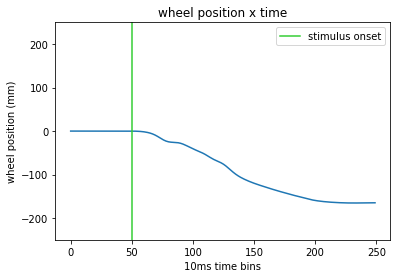

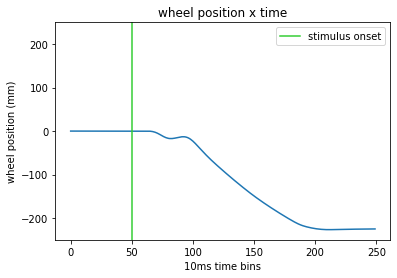

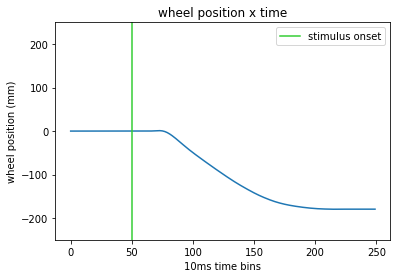

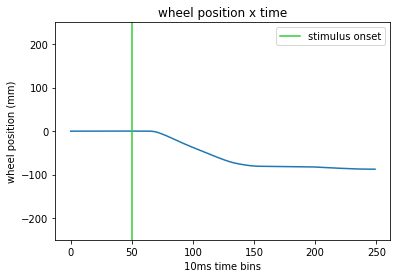

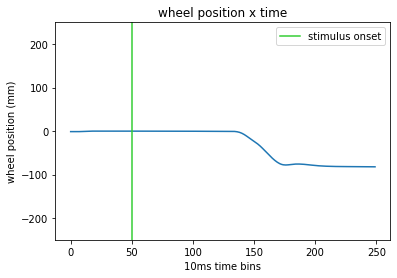

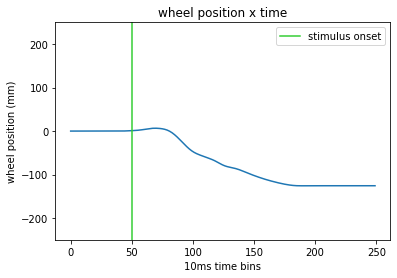

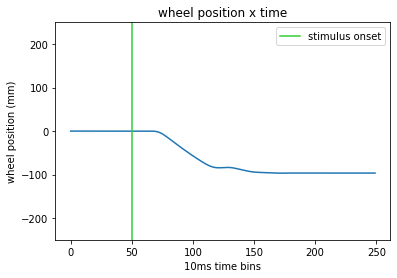

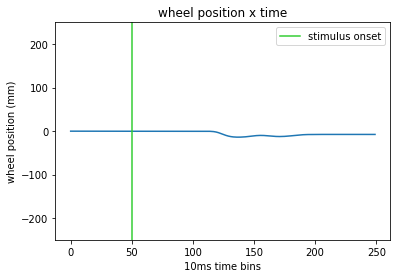

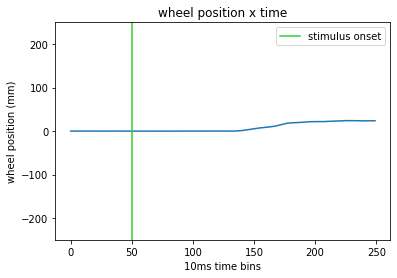

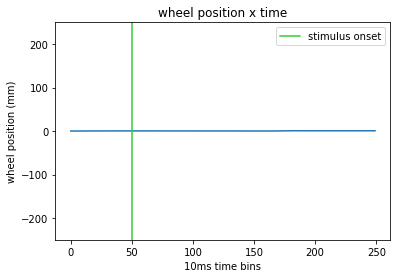

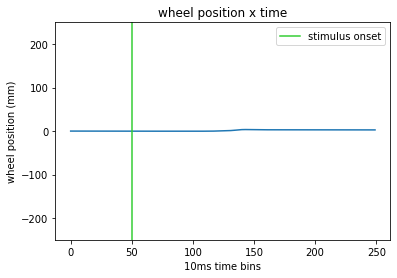

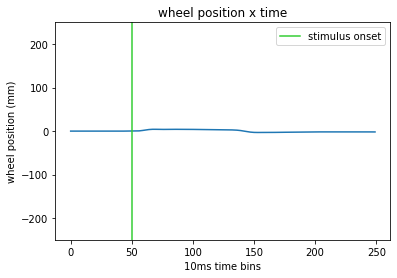

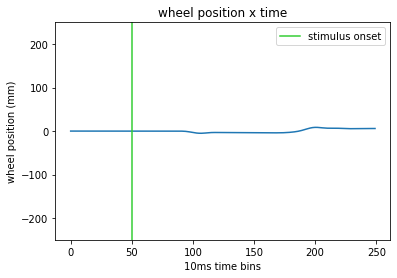

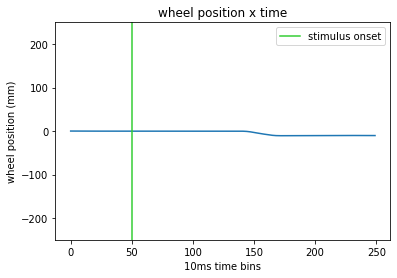

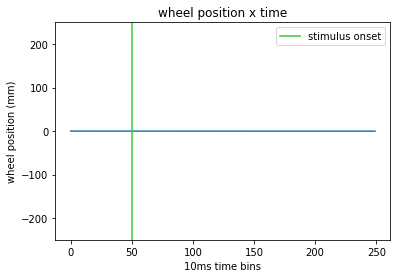

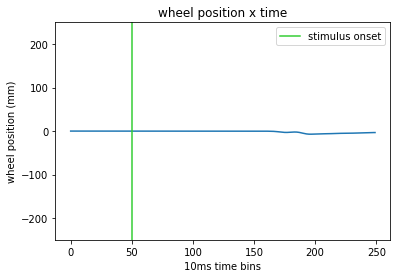

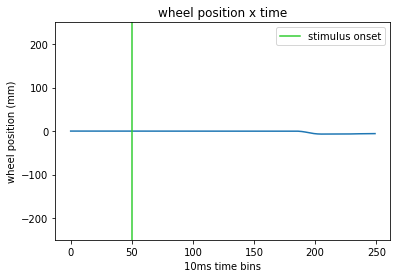

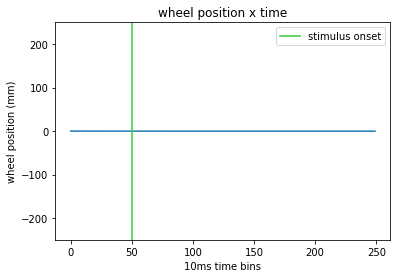

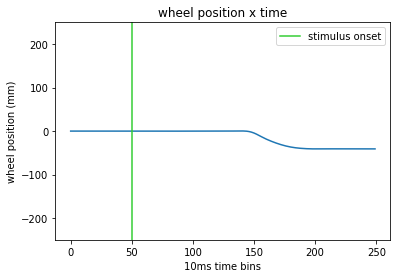

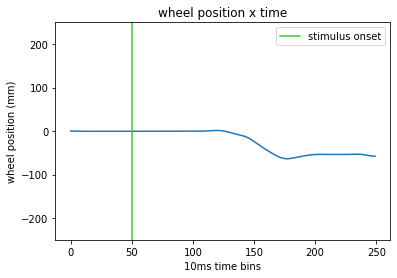

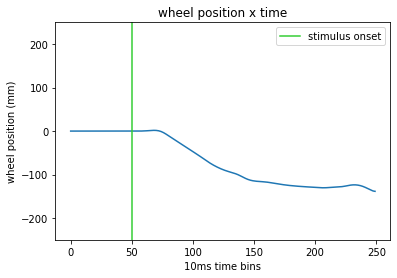

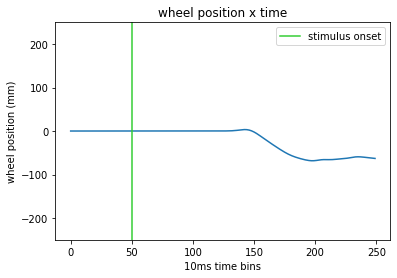

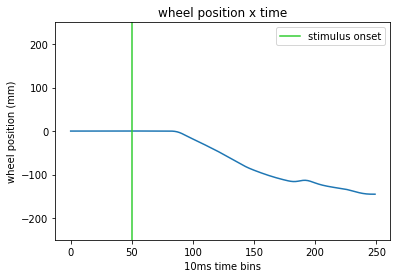

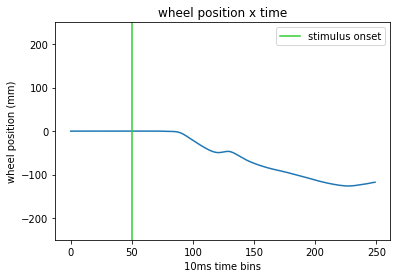

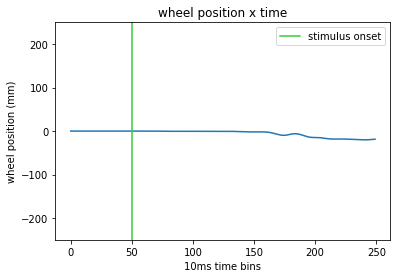

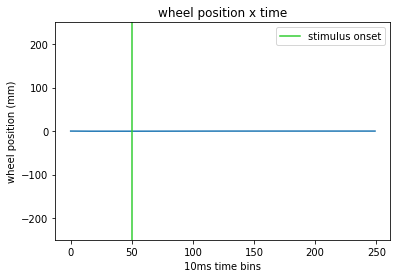

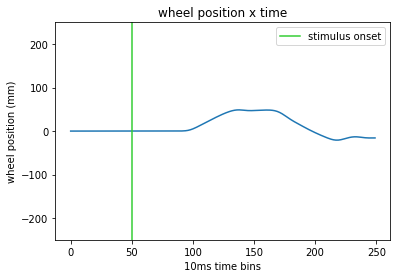

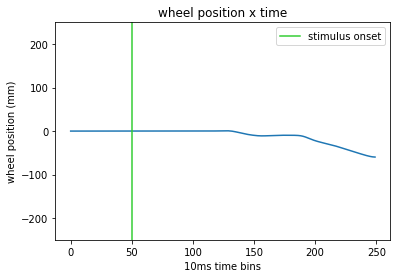

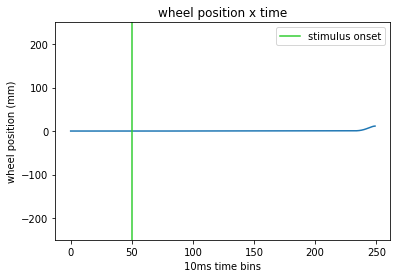

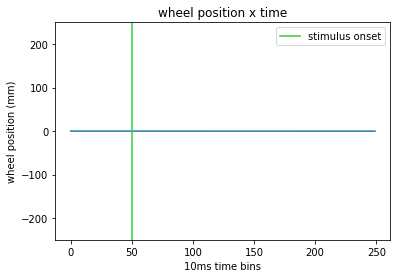

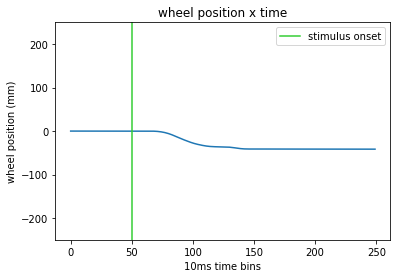

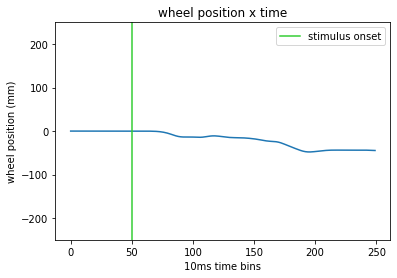

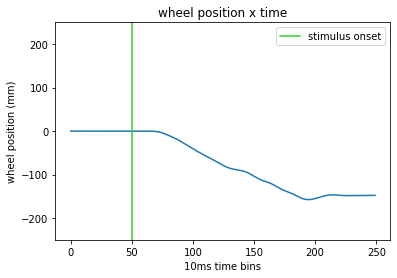

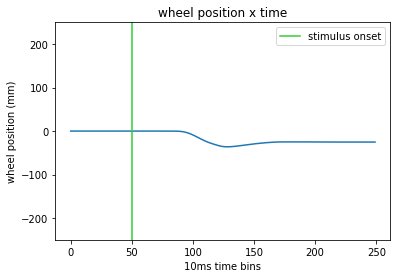

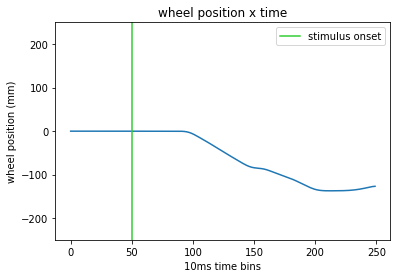

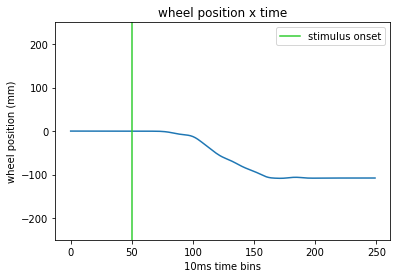

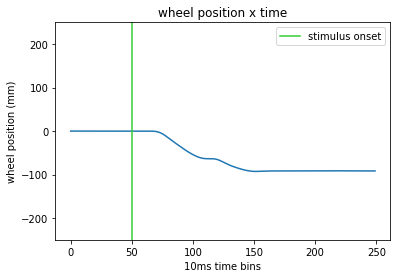

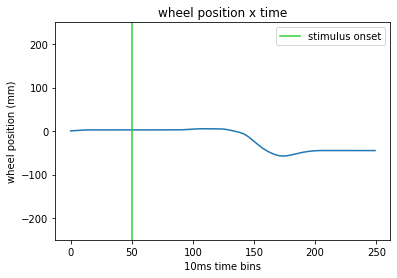

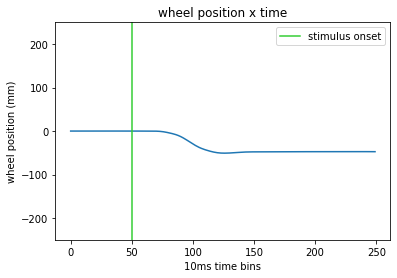

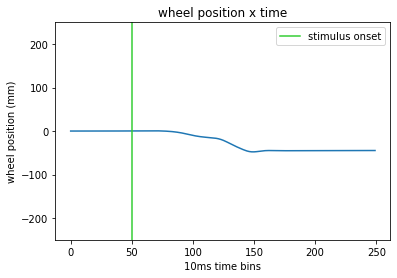

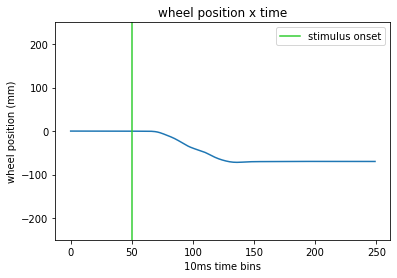

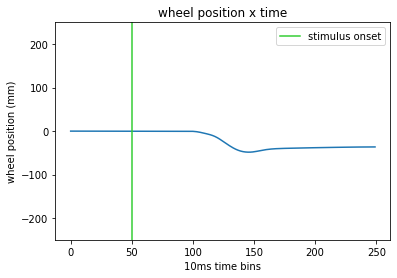

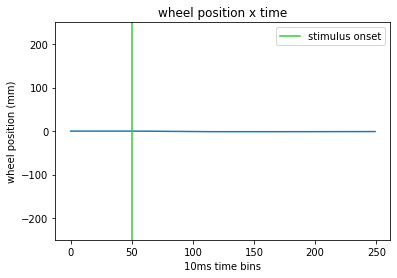

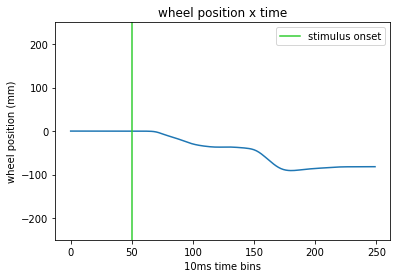

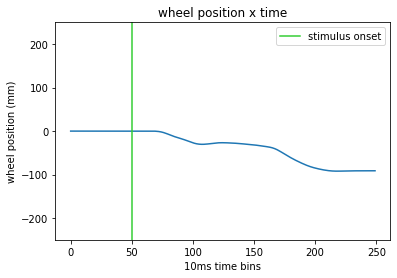

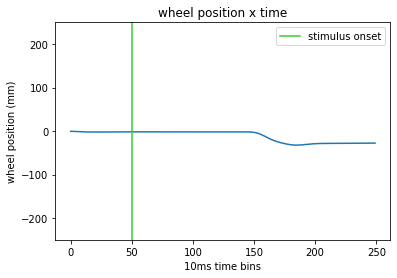

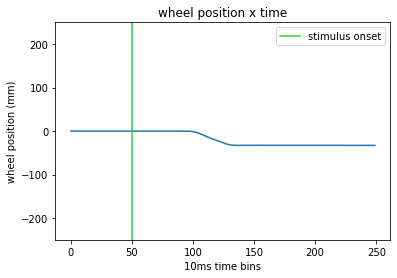

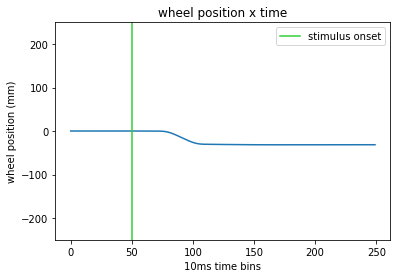

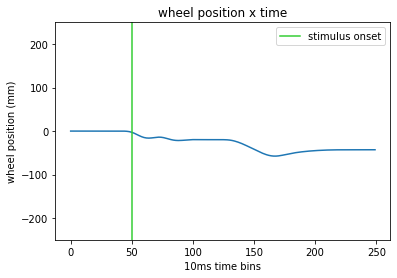

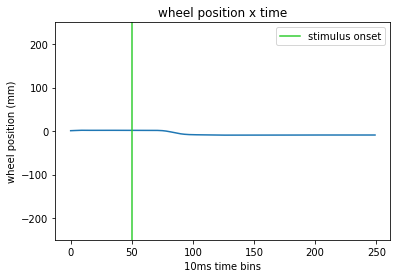

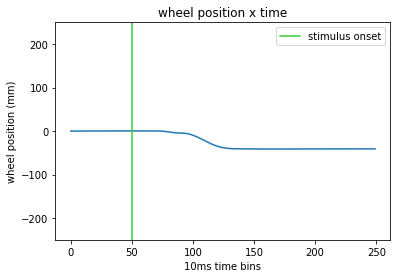

In [16]:
# plot RL
for idx, recording in enumerate(topk_wheel):
    filtered_trials = recording[trials_RL_idx[idx]]
    for trial in filtered_trials:
        plot_wheel_movement1(trial)

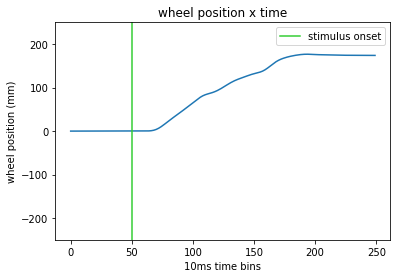

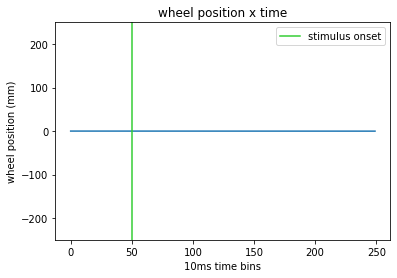

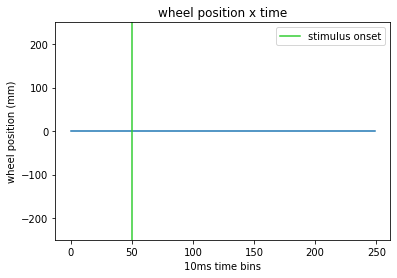

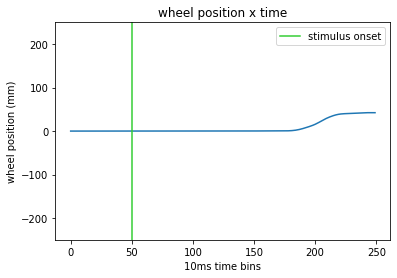

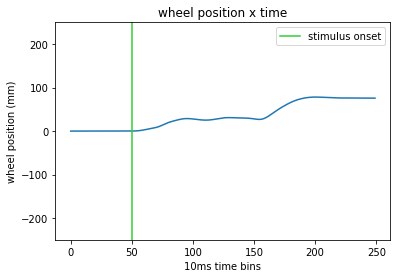

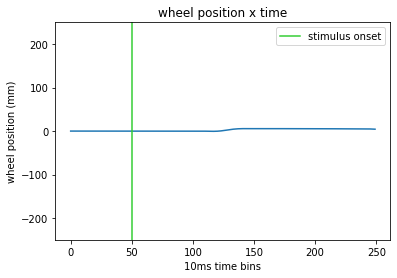

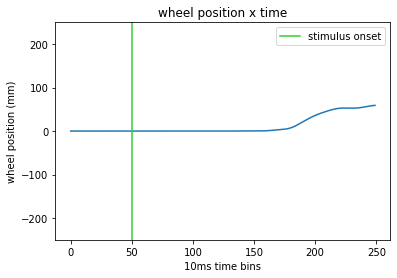

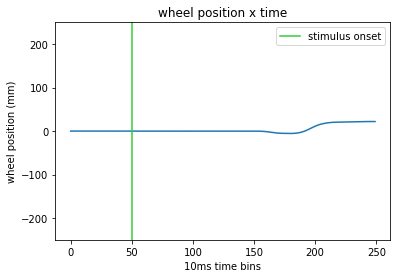

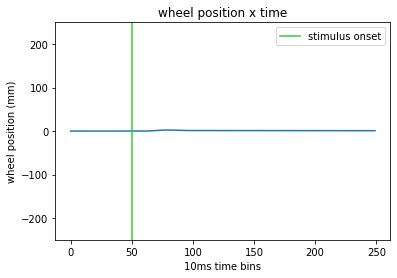

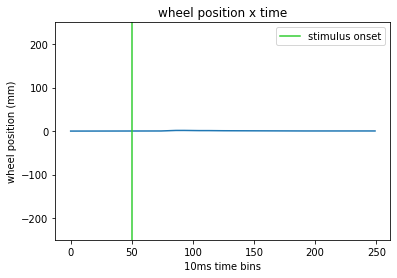

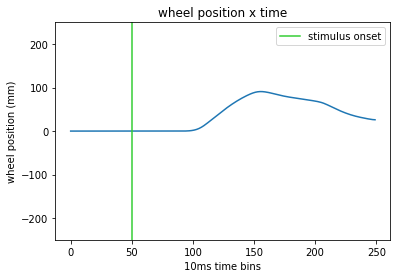

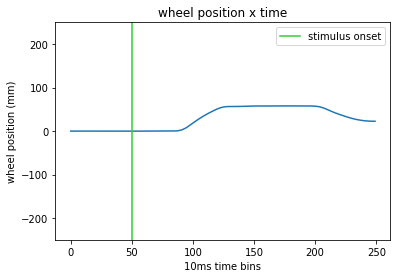

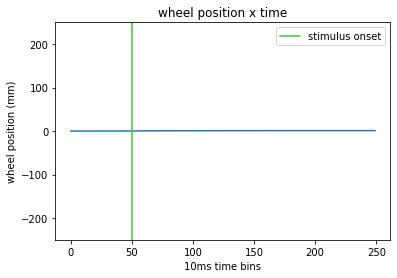

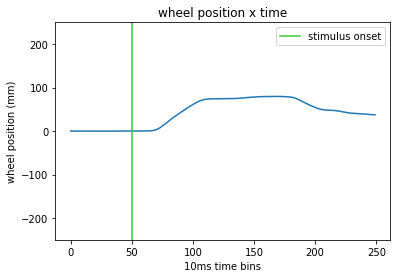

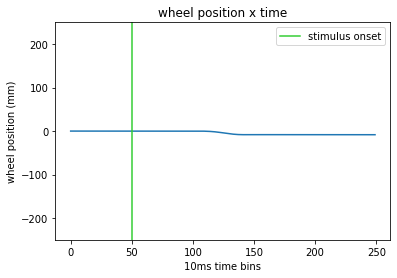

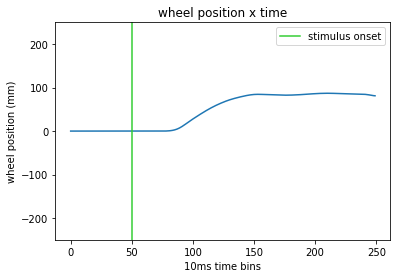

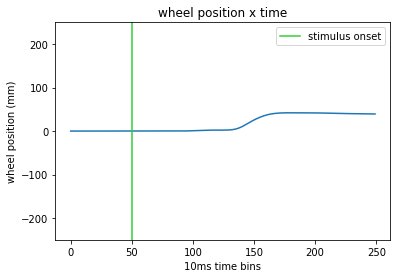

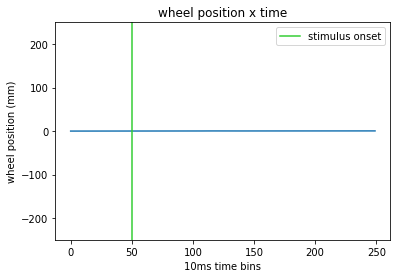

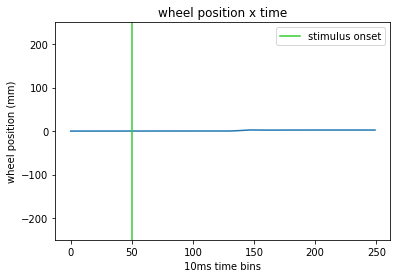

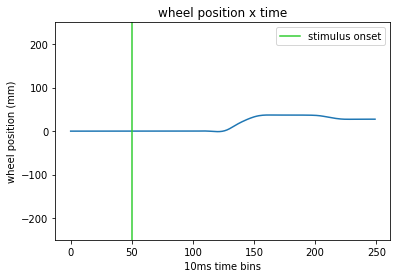

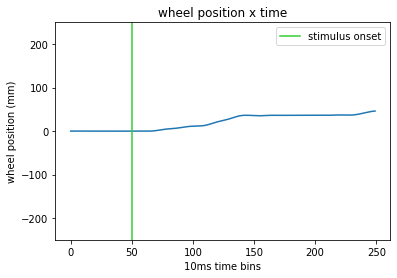

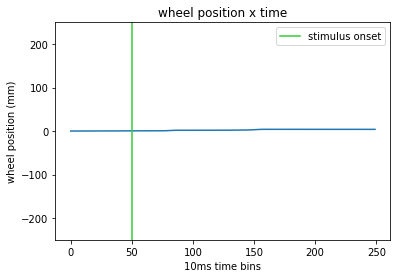

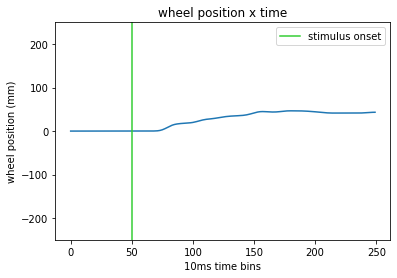

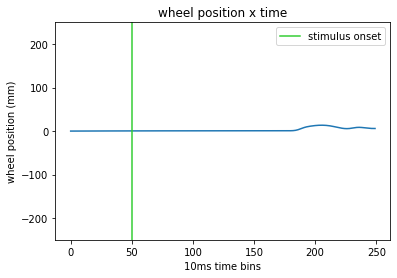

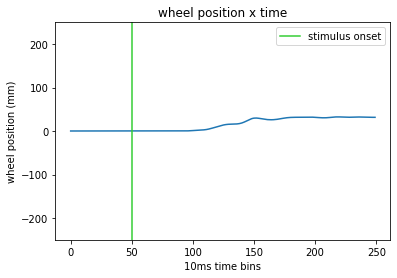

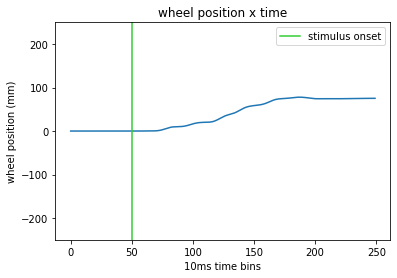

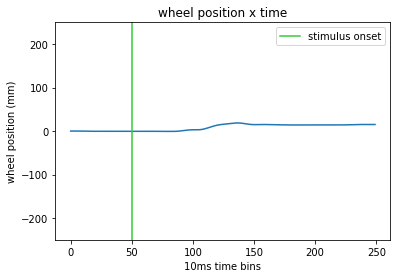

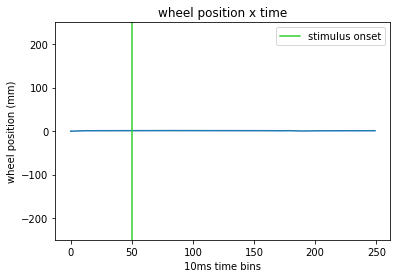

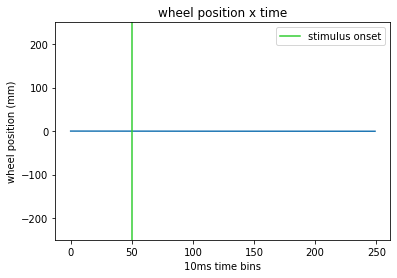

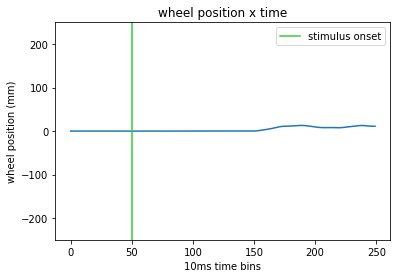

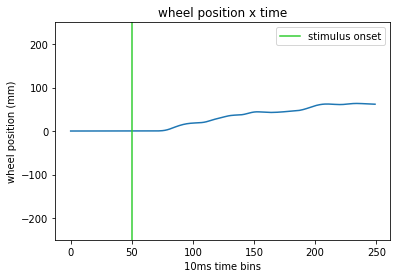

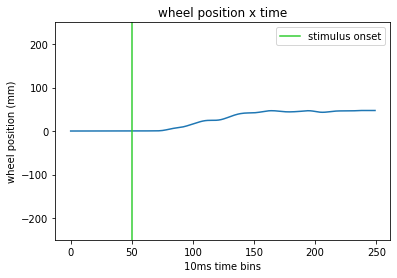

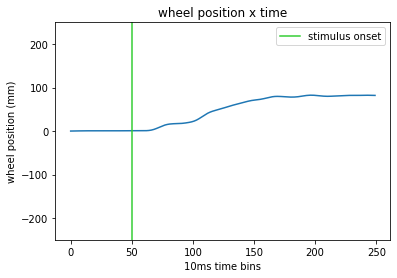

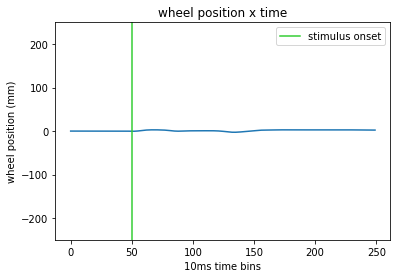

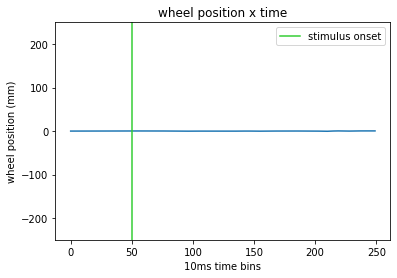

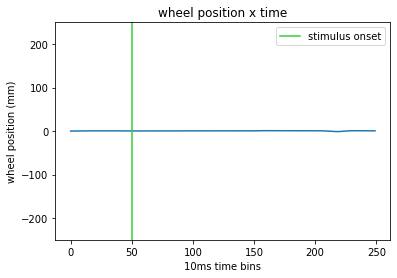

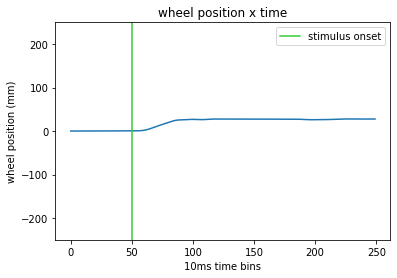

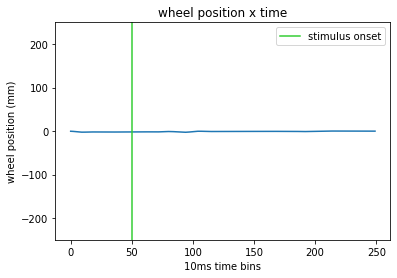

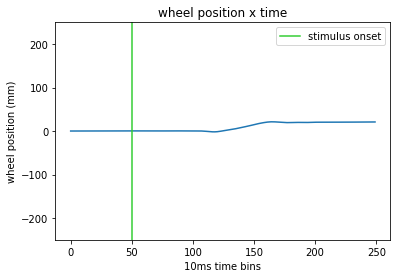

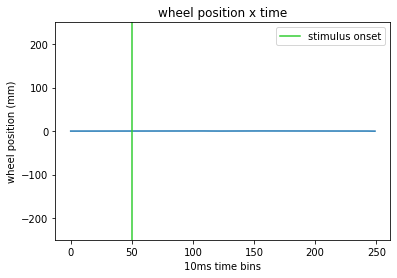

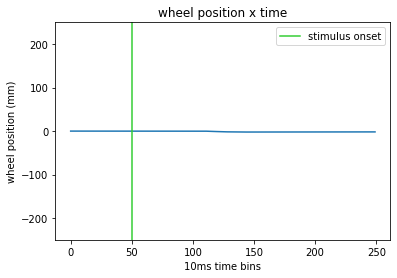

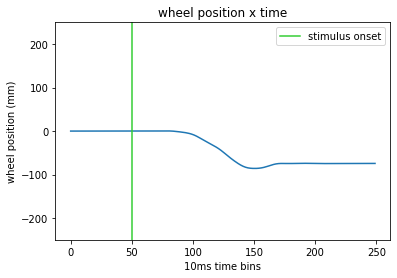

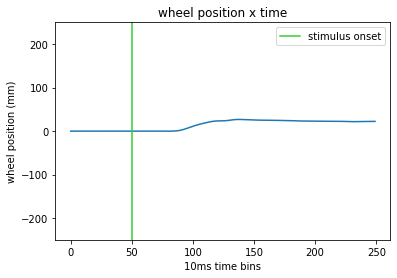

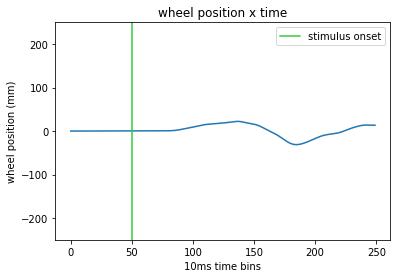

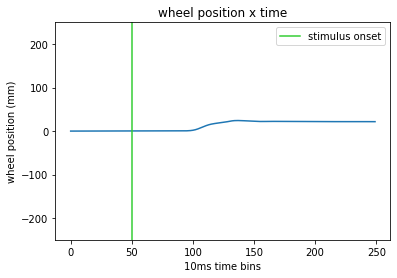

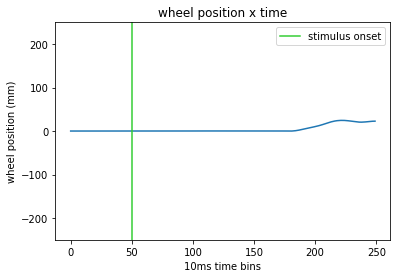

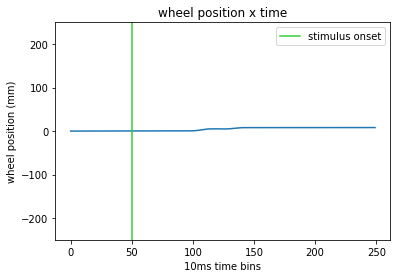

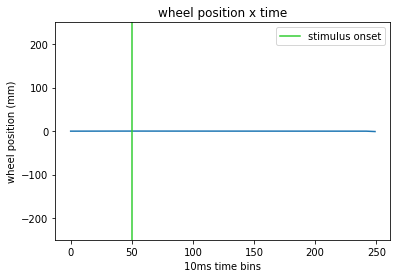

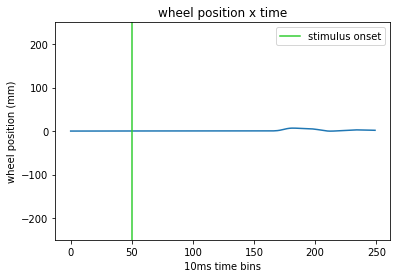

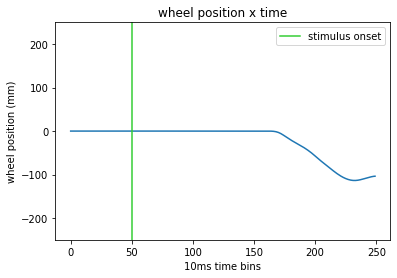

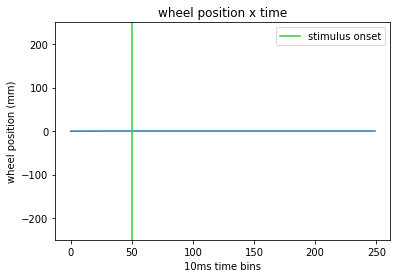

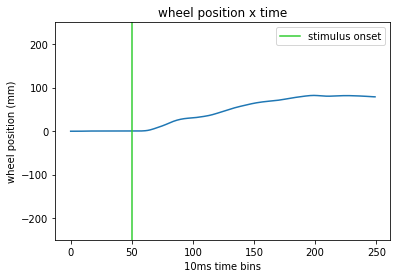

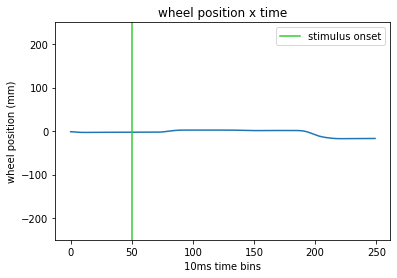

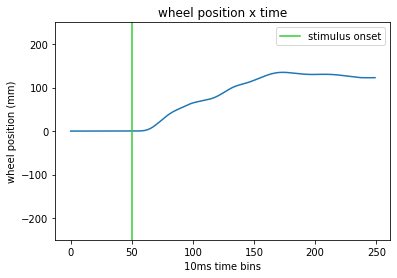

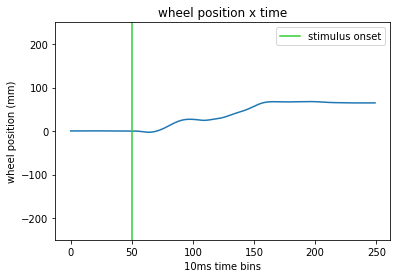

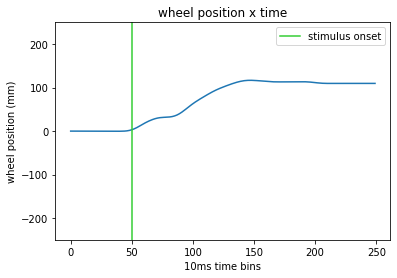

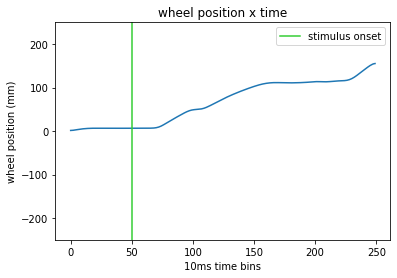

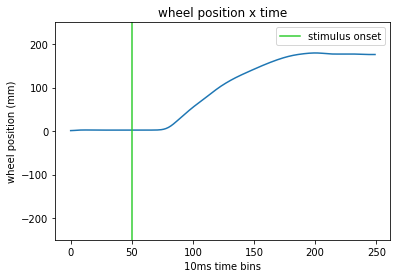

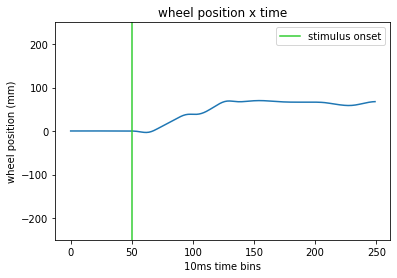

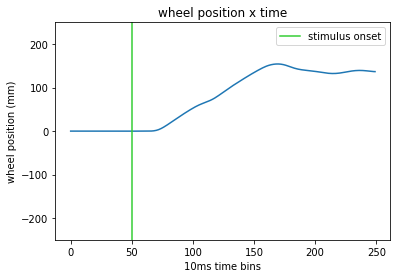

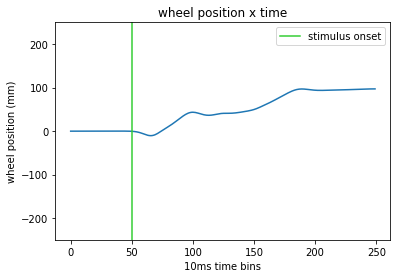

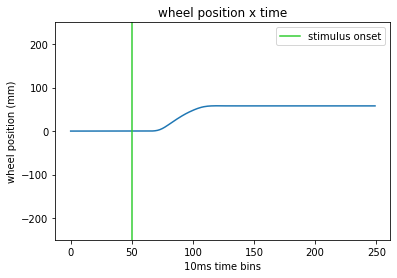

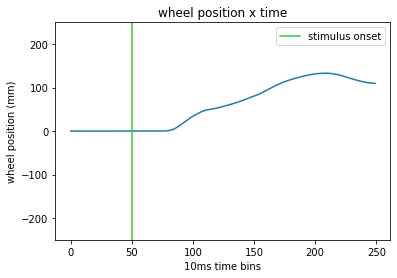

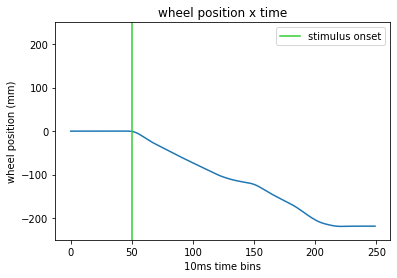

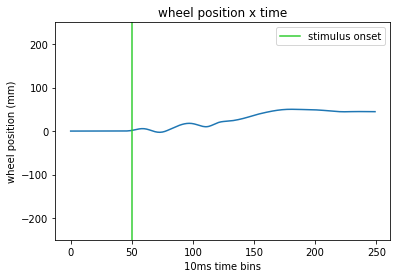

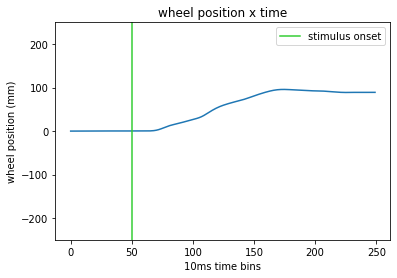

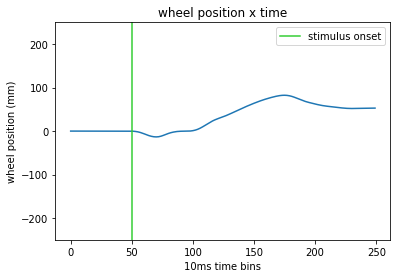

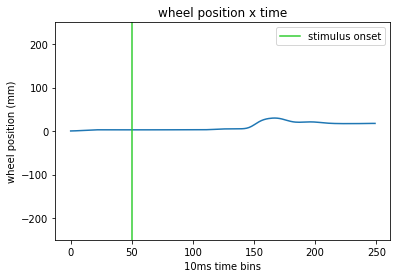

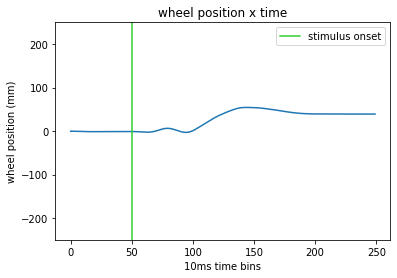

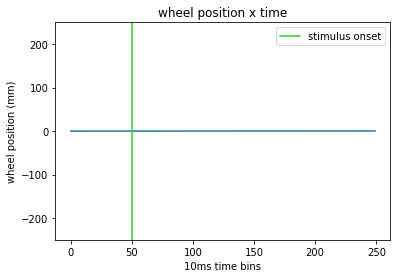

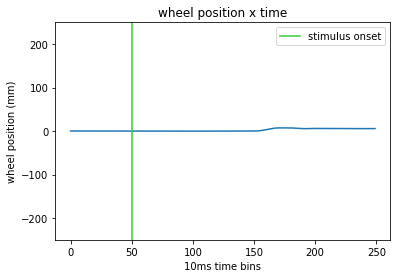

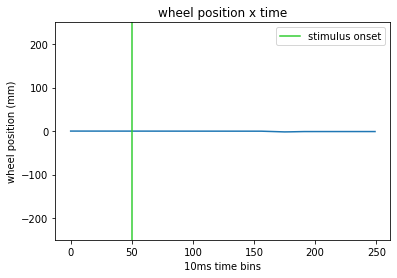

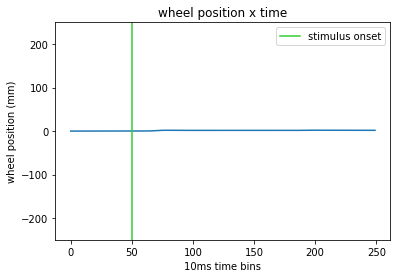

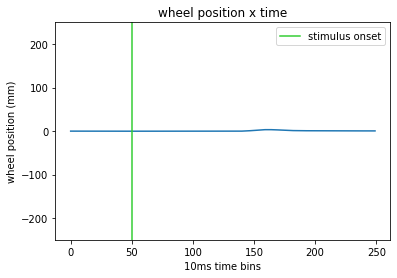

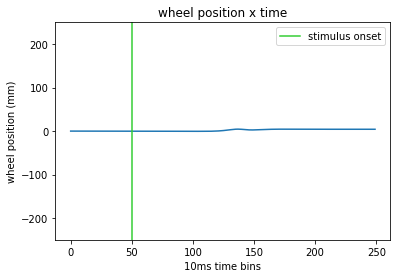

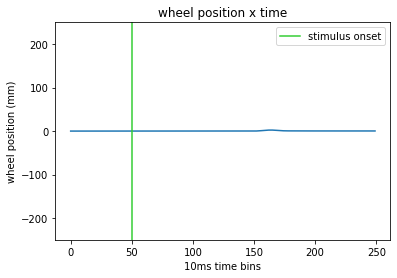

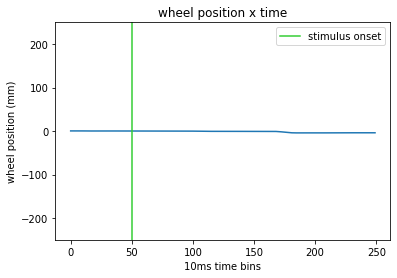

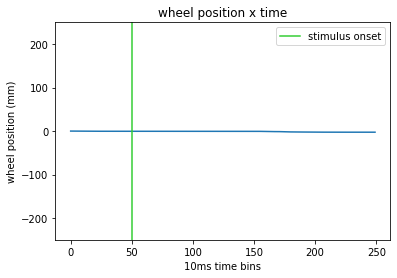

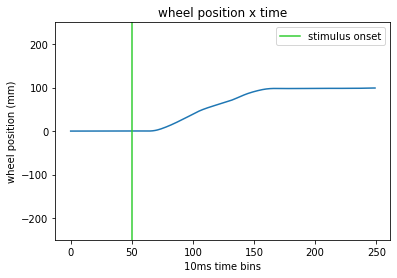

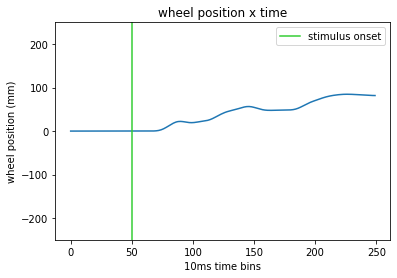

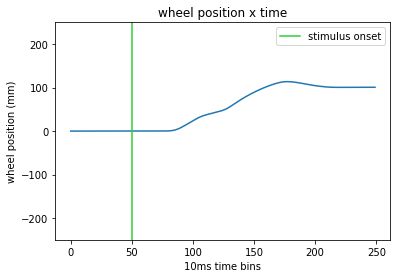

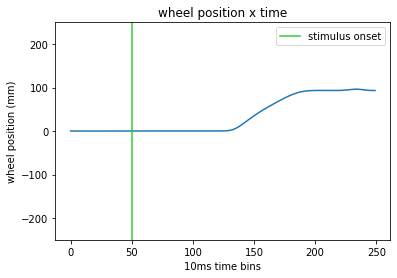

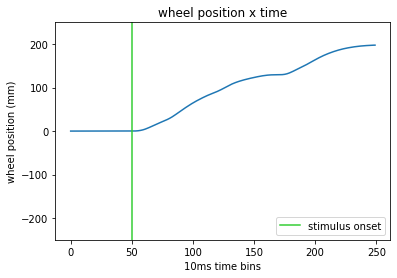

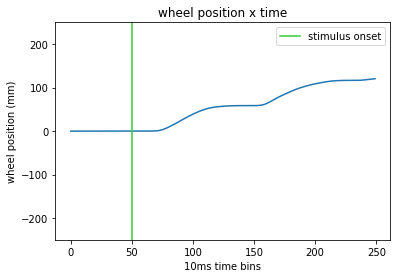

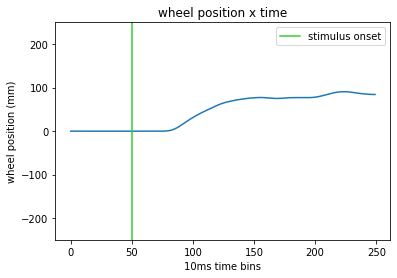

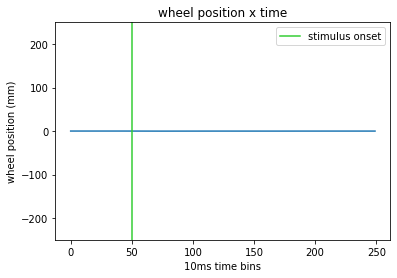

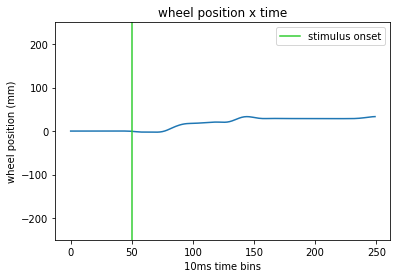

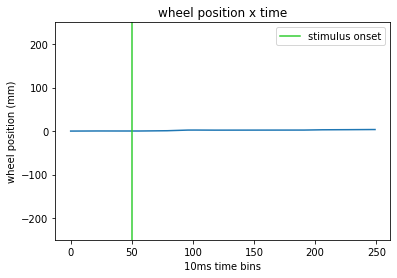

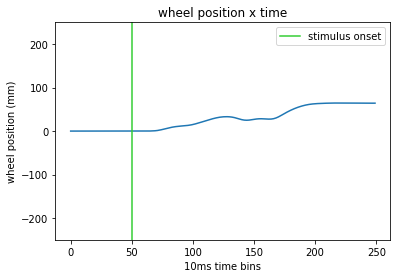

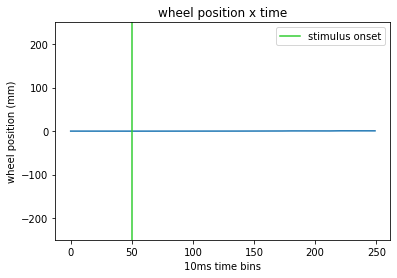

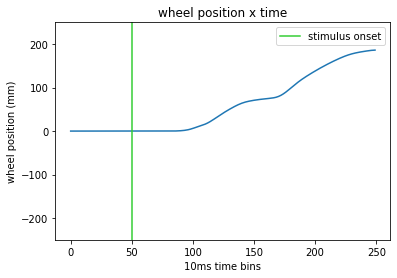

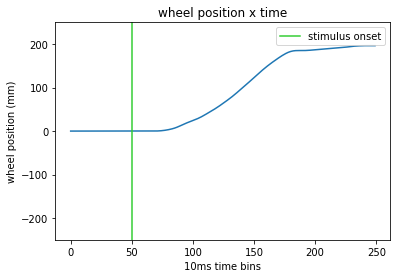

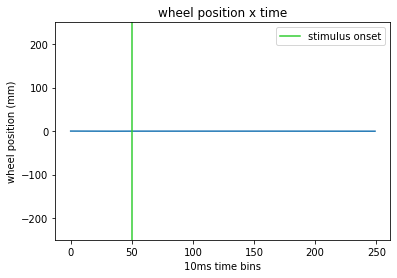

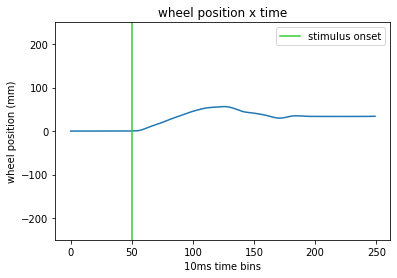

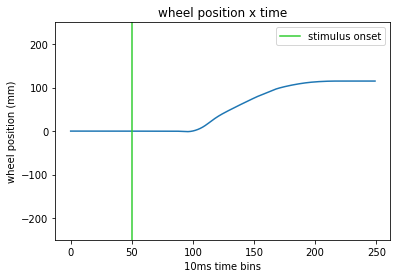

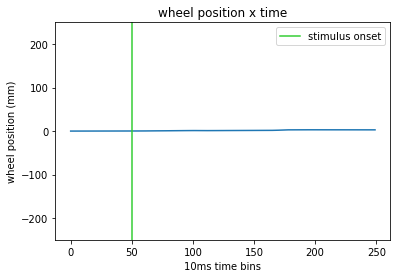

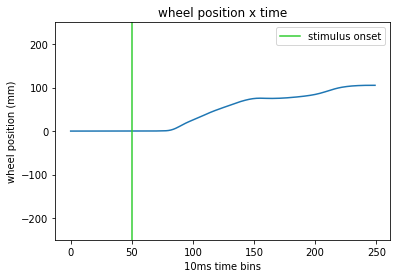

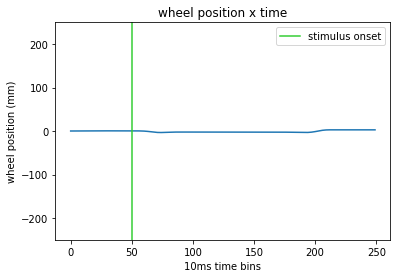

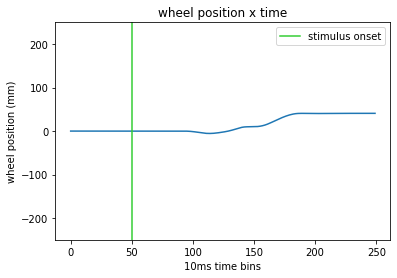

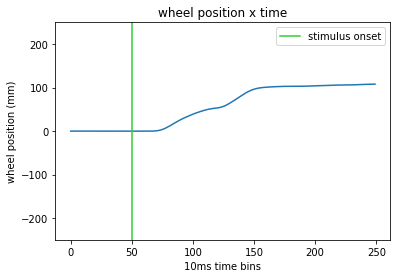

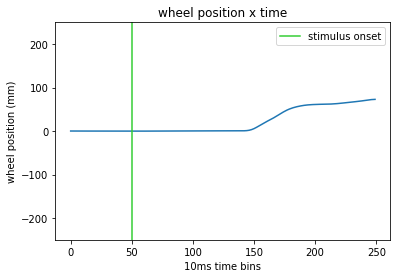

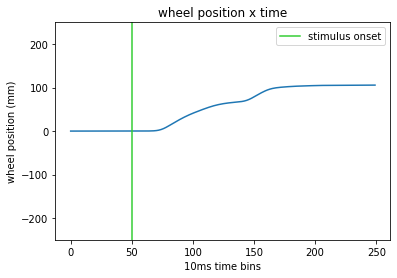

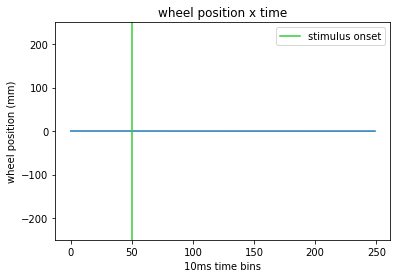

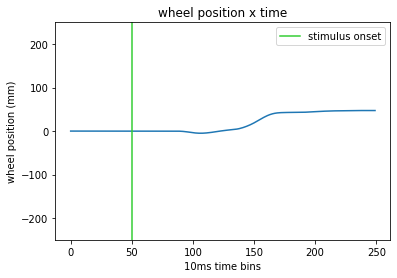

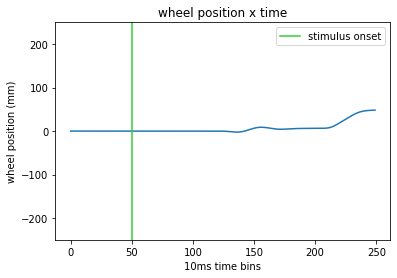

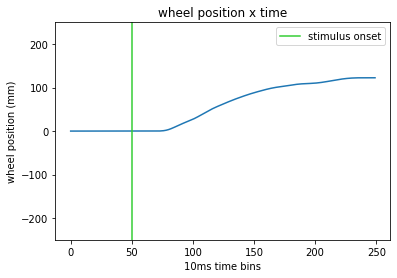

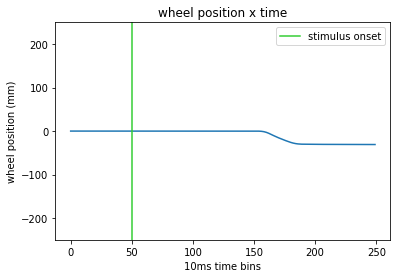

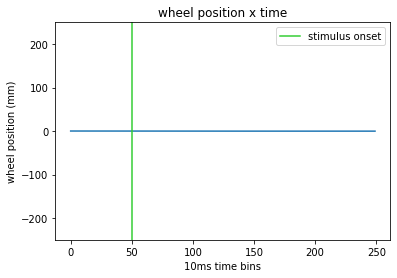

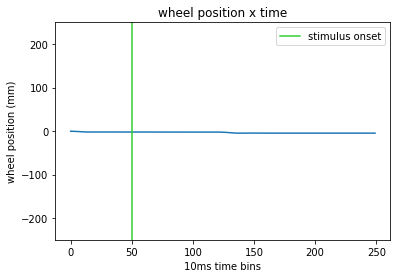

In [17]:
# plot LR
for idx, recording in enumerate(topk_wheel):
    filtered_trials = recording[trials_LR_idx[idx]]
    for trial in filtered_trials:
        plot_wheel_movement1(trial)